In [ ]:
# 뉴스기사 카테고리별로 분류되어 있는 데이터(11314개)
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
dataset = fetch_20newsgroups(shuffle=True,random_state=1,remove=('headers','footers','quotes'))
documents = dataset.data
len(documents)

11314

In [ ]:
documents[99]

"For Sale:  1990 Pontiac Grand Prix SE\n\nWhite, White rims, Gray interior.\n58K miles (mostly highway),\n3.8 Litre V6 multi-port fuel-injected engine,\n5 speed manual transmission.\n\nOptions include:\n\nA/C,\nRear defogger,\nPower steering,\nPower brakes,\nPower windows,\nPower locks,\nPower mirrors,\nCruise control,\nPower glass moonroof with sunshade,\nPower seat/recliner (driver's),\nPower seat/comfort/lumbar/headrest (both),\nAM/FM cassette stero,\nElectronic monitor/service system\nwith graphic compass,\nStereo controls duplicated on\nsteering wheel,\nRemote-keyless entry,\nand others.\n\nAsking $11,500.\n\nThe car looks and rides like it just rolled off\nof the dealers lot.  It has been garaged and pampered.\nIt gets an average of 27.5 mpg highway, sometimes better;\ncity is around 19-23 mpg, depending on how it is driven.\n\nSelling because of baby coming soon.  Need 4-door family\ncar.  Will consider trade or partial trade with Ford Taurus,\nMercury Sable, or 4-door Pontiac G

In [ ]:
# 카테고리 종류 개수 : 20개
print(dataset.target_names)
len(dataset.target_names)

['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


20

In [ ]:
# 데이터 프레임 생성 및 전처리
df = pd.DataFrame({'document' : documents})
df['clean_doc'] = df['document'].str.replace("[^a-zA-z]"," ")
df['clean_doc'] = df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))   # 길이가 3 이하인 단어는 제거(짧은 단어 제거)
df['clean_doc'] = df['clean_doc'].apply(lambda x: x.lower())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df['clean_doc'][334]

'ground launch entirely posible launch from altitude this what shuttle originally intended might seriously cheaper also what about engineered absorbing plants instead many bottles stick lunar cave airlock door'

In [ ]:
# 토큰화 후 불용어 제거
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
tokenized_doc = df['clean_doc'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# TF-IDF 기법 적용을 위한 역토큰화 수행(불용어 없는 문장으로 돌아감)
detokenized_doc = []
for i in range(len(df)) : 
  t = ' '.join(tokenized_doc[i])
  detokenized_doc.append(t)
df['clean_doc'] = detokenized_doc

df['clean_doc'][33]

'gift think basically reasoning tradition church held mary also without jesus tenets faith developed particularly augustine equated thus mary assumed virgin life since never sinned since spouse since also notion original born predisposition since mary predisposition ever original science discovered process conception next step assume mary conceived without original immaculate conception mary time appeared girl named bernadette lourdes refered immaculate conception since nine year would knowing doctrine apparition deemed true sealed case doctrine hold revelation comes equally important sources sacred scripture holy tradition case mostly tradition'

In [ ]:
# TF-IDF 기법 수행(상위 1000개 단어로만 --> 나중에 max_features 조정해보자)
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(stop_words='english',max_features=1000,max_df=0.5,smooth_idf=True)
x = vec.fit_transform(df['clean_doc'])
x.shape

(11314, 1000)

In [ ]:
# 차원 축소(Truncated SVD)
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=20,algorithm='randomized',n_iter=100,random_state=122)
svd_model.fit(x)
len(svd_model.components_)

/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

20

In [ ]:
np.shape(svd_model.components_)

(20, 1000)

In [ ]:
terms = vec.get_feature_names()  # 단어집합(max_features 개수만큼 있음)
def get_topics(components,feature_names,n=5) : 
  for idx,topic in enumerate(components):
    print('Topic %d: '% (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[:-n - 1:-1]])
get_topics(svd_model.components_,terms)

Topic 1:  [('like', 0.2139), ('know', 0.20012), ('people', 0.19305), ('think', 0.17774), ('good', 0.15104)]
Topic 2:  [('thanks', 0.33002), ('windows', 0.29084), ('card', 0.17998), ('drive', 0.17364), ('mail', 0.15048)]
Topic 3:  [('game', 0.37051), ('team', 0.32695), ('year', 0.28611), ('games', 0.25368), ('season', 0.18468)]
Topic 4:  [('drive', 0.52826), ('scsi', 0.20092), ('disk', 0.15512), ('hard', 0.15473), ('card', 0.1411)]
Topic 5:  [('windows', 0.40595), ('file', 0.25593), ('window', 0.1811), ('files', 0.16394), ('program', 0.14146)]
Topic 6:  [('chip', 0.16228), ('government', 0.16034), ('mail', 0.15563), ('space', 0.15139), ('information', 0.13662)]
Topic 7:  [('like', 0.6745), ('bike', 0.14275), ('chip', 0.10957), ('know', 0.10922), ('sounds', 0.10402)]
Topic 8:  [('card', 0.47705), ('video', 0.22524), ('sale', 0.20774), ('monitor', 0.15491), ('offer', 0.14245)]
Topic 9:  [('know', 0.47441), ('card', 0.31908), ('chip', 0.17986), ('government', 0.15173), ('video', 0.13522)]


In [ ]:
# LDA 기법 적용하여 토픽 분포 확인
tokenized_doc[:5]

0    [well, sure, story, seem, biased, disagree, st...
1    [yeah, expect, people, read, actually, accept,...
2    [although, realize, principle, strongest, poin...
3    [notwithstanding, legitimate, fuss, proposal, ...
4    [well, change, scoring, playoff, pool, unfortu...
Name: clean_doc, dtype: object

In [ ]:
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]

In [ ]:
corpus[1]
# (52,1) --> 52번으로 인코딩 된 단어가 2번째 corpus에 1번 등장했음!

[(52, 1),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 2),
 (67, 1),
 (68, 1),
 (69, 1),
 (70, 1),
 (71, 2),
 (72, 1),
 (73, 1),
 (74, 1),
 (75, 1),
 (76, 1),
 (77, 1),
 (78, 2),
 (79, 1),
 (80, 1),
 (81, 1),
 (82, 1),
 (83, 1),
 (84, 1),
 (85, 2),
 (86, 1),
 (87, 1),
 (88, 1),
 (89, 1)]

In [ ]:
print(dictionary[52])  # 52번 단어 : well

well


In [ ]:
# LDA 모델 훈련
import gensim
ldamodel = gensim.models.ldamodel.LdaModel(corpus,num_topics=20, id2word=dictionary,passes=15)   # 숫자인코딩 된 단어들을 가지고 20개의 토픽(기사 종류)으로 학습
# passes = 숫자 : 알고리즘의 동작 횟수(학습횟수) --> 충분히 적당한 횟수가 나오도록 여러 숫자로 test
topics = ldamodel.print_topics(num_words=4)  # 각 topic 별로 4개의 단어들을 추출
for topic in topics:
  print(topic)

# (기여도 * 토큰화된 단어) 들의 합으로 구성되어 있음

In [ ]:
# LDA 시각화
!pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel,corpus,dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
# 결과
# 1. 원들이 겹친다면, 유사한 토픽이라는 의미
# 2. 오른쪽에는 클릭한 토픽의 단어들의 빈도 및 전체 단어에서 차지하는 비중 표시
# 3. 전체 단어의 등장횟수와 선택된 토픽의 등장횟수 비교 가능

In [ ]:
# 각 문서별 토픽 분포확인
for i, topic_list in enumerate(ldamodel[corpus]) : 
  if i ==5:
    break
  print(i,'번째 문서의 topic 비율은',topic_list)

0 번째 문서의 topic 비율은 [(0, 0.7019065), (13, 0.059402134), (14, 0.04134478), (18, 0.18444338)]
1 번째 문서의 topic 비율은 [(0, 0.4448286), (7, 0.2296549), (8, 0.025609758), (12, 0.20191583), (19, 0.07969824)]
2 번째 문서의 topic 비율은 [(0, 0.6521503), (11, 0.04954786), (16, 0.048805967), (18, 0.23659272)]
3 번째 문서의 topic 비율은 [(0, 0.3740216), (1, 0.10066899), (9, 0.29348838), (16, 0.017736929), (17, 0.20289008)]
4 번째 문서의 topic 비율은 [(0, 0.08710969), (5, 0.10486044), (14, 0.7765484)]


In [ ]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)

        for j, (topic_num, prop_topic) in enumerate(doc):
            if j == 0: 
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
            else:
                break
    return(topic_table)

In [ ]:
topictable = make_topictable_per_doc(ldamodel,corpus)
topictable = topictable.reset_index()
topictable.columns= ['문서 번호', '가장 비중이 높은 번호','가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:10]

,문서 번호,가장 비중이 높은 번호,가장 높은 토픽의 비중,각 토픽의 비중
0,0,0.0,0.7019,"[(0, 0.7018821), (13, 0.059447747), (14, 0.041..."
1,1,0.0,0.4448,"[(0, 0.44476566), (7, 0.22964787), (8, 0.02560..."
2,2,0.0,0.6522,"[(0, 0.65217423), (11, 0.049547818), (16, 0.04..."
3,3,0.0,0.3740,"[(0, 0.37402228), (1, 0.100669004), (9, 0.2934..."
4,4,14.0,0.7766,"[(0, 0.08701978), (5, 0.10487724), (14, 0.7766..."
5,5,0.0,0.8988,"[(0, 0.89878273), (12, 0.06371726)]"
6,6,13.0,0.7186,"[(0, 0.04569613), (2, 0.016324382), (5, 0.0343..."
7,7,0.0,0.6963,"[(0, 0.6963499), (3, 0.15900491), (7, 0.059909..."
8,8,0.0,0.3416,"[(0, 0.34161958), (7, 0.14240721), (8, 0.27093..."
9,9,17.0,0.6346,"[(0, 0.13530731), (9, 0.06845107), (10, 0.0225..."


## LDA 모델 평가 : Perplexity / Coherence
* Perplexity : 토픽 개수를 몇개로 할것인지에 대한 평가지표로 쓰기 용이, 값이 낮을수록 좋음, 값이 낮다는 것이 결과가 사람이 해석하기에 좋은게 아니란 단점존재
* Coherence : 사람이 해석하기에 적합한 평가 척도, 값이 높을수록 일관성이 높다는 것, Coherence안에서도 다양한 평가지표 존재

In [ ]:
# LDA 모델 평가(현재 학습한 모델)
from gensim.models.coherencemodel import CoherenceModel
cm = CoherenceModel(model=ldamodel,corpus=corpus,coherence='u_mass')
coherence = cm.get_coherence()
print('coherence 값 : ', coherence)
print('\nPerplexity 값 : ',ldamodel.log_perplexity(corpus))

In [ ]:
# 모델 튜닝작업 : coherence
coherence_values = []
for i in range(2,21):
  ldamodel = gensim.models.ldamodel.LdaModel(corpus,num_topics=i, id2word=dictionary,passes=15)   # 숫자인코딩 된 단어들을 가지고 20개의 토픽(기사 종류)으로 학습
  cm = CoherenceModel(model=ldamodel,corpus=corpus,coherence='u_mass')
  coherence = cm.get_coherence()
  coherence_values.append(coherence)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

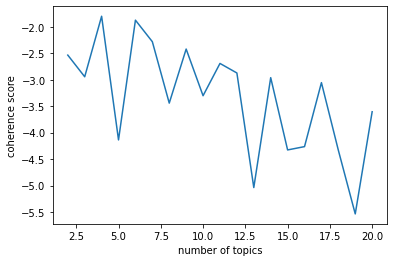

In [ ]:
import matplotlib.pyplot as plt
x = range(2,21)
plt.plot(x,coherence_values)
plt.xlabel('number of topics')
plt.ylabel('coherence score')
plt.show()
# num_topics가 3또는 6정도일때 coherence가 제일 높은듯 하다!

In [ ]:
# 튜닝된 파라미터로 학습
ldamodel = gensim.models.ldamodel.LdaModel(corpus,num_topics=6, id2word=dictionary,passes=15)   # 숫자인코딩 된 단어들을 가지고 20개의 토픽(기사 종류)으로 학습
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel,corpus,dictionary)
pyLDAvis.display(vis)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

In [ ]:
topictable = make_topictable_per_doc(ldamodel,corpus)
topictable = topictable.reset_index()
topictable.columns= ['문서 번호', '가장 비중이 높은 번호','가장 높은 토픽의 비중', '각 토픽의 비중']
topictable[:15]

,문서 번호,가장 비중이 높은 번호,가장 높은 토픽의 비중,각 토픽의 비중
0,0,3.0,0.6652,"[(2, 0.32399178), (3, 0.66519797)]"
1,1,3.0,0.8008,"[(3, 0.8007795), (5, 0.18290827)]"
2,2,3.0,0.6270,"[(2, 0.1753463), (3, 0.6270388), (4, 0.1423134..."
3,3,4.0,0.6533,"[(1, 0.022134826), (2, 0.10883725), (3, 0.2106..."
4,4,0.0,0.5122,"[(0, 0.51221097), (3, 0.014710772), (5, 0.4543..."
5,5,3.0,0.7285,"[(0, 0.05614334), (1, 0.19441758), (3, 0.72846..."
6,6,1.0,0.7697,"[(1, 0.7696679), (4, 0.22719344)]"
7,7,3.0,0.6731,"[(2, 0.09089283), (3, 0.67310274), (5, 0.22802..."
8,8,4.0,0.4419,"[(3, 0.4270454), (4, 0.44189098), (5, 0.1175034)]"
9,9,5.0,0.5888,"[(4, 0.40194413), (5, 0.5888433)]"


In [ ]:
# 뉴스 기사 제목 데이터로 LDA 실습
import urllib.request
urllib.request.urlretrieve('https://raw.githubusercontent.com/franciscadias/data/master/abcnews-date-text.csv', filename='abcnews-date-text.csv')
data = pd.read_csv('abcnews-date-text.csv',error_bad_lines=False)
print('데이터 길이 : ',len(data))
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


데이터 길이 :  1082168


,publish_date,headline_text
0,20030219,aba decides against community broadcasting lic...
1,20030219,act fire witnesses must be aware of defamation
2,20030219,a g calls for infrastructure protection summit
3,20030219,air nz staff in aust strike for pay rise
4,20030219,air nz strike to affect australian travellers


In [ ]:
text = data[['headline_text']]
text.head()

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers


In [ ]:
import nltk
nltk.download('punkt')
text['headline_text'] = text.apply(lambda x: nltk.word_tokenize(x['headline_text']),axis=1)
stop_words = stopwords.words('english')
text['headline_text'] = text['headline_text'].apply(lambda x: [word for word in x if word not in (stop_words)])
print(text.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


                                       headline_text
0   [aba, decides, community, broadcasting, licence]
1    [act, fire, witnesses, must, aware, defamation]
2     [g, calls, infrastructure, protection, summit]
3          [air, nz, staff, aust, strike, pay, rise]
4  [air, nz, strike, affect, australian, travellers]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
text['headline_text'] = text['headline_text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x])
text.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,headline_text
0,"[aba, decide, community, broadcast, licence]"
1,"[act, fire, witness, must, aware, defamation]"
2,"[g, call, infrastructure, protection, summit]"
3,"[air, nz, staff, aust, strike, pay, rise]"
4,"[air, nz, strike, affect, australian, travellers]"


In [ ]:
tokenized_doc = text['headline_text'].apply(lambda x: [word for word in x if len(word) > 3])
tokenized_doc[:5]

0       [decide, community, broadcast, licence]
1      [fire, witness, must, aware, defamation]
2    [call, infrastructure, protection, summit]
3                   [staff, aust, strike, rise]
4      [strike, affect, australian, travellers]
Name: headline_text, dtype: object

In [ ]:
# 역토큰화
detokenized_doc = []
for i in range(len(text)):
  t = ' '.join(tokenized_doc[i])
  detokenized_doc.append(t)
text['headline_text']= detokenized_doc
print(text['headline_text'][:5])

0       decide community broadcast licence
1       fire witness must aware defamation
2    call infrastructure protection summit
3                   staff aust strike rise
4      strike affect australian travellers
Name: headline_text, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# TF-IDF 적용
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english',max_features=1000)
x = vectorizer.fit_transform(text['headline_text'])
x.shape

(1082168, 1000)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation     # 이게 직접적으로 LDA를 수행하는 작업인듯 함!
lda_model = LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1)  
# n_components : 토픽 개수(10개)
# learning_method = 'online' : 토픽종류를 업데이트 하기위한 방법 / 디폴트값은 batch인데, 데이터가 많다면 online을 사용!
# max_iter : 학습 횟수
lda_top = lda_model.fit_transform(x)
print(lda_model.components_)
print(lda_model.components_.shape)

[[1.00001578e-01 1.00001244e-01 3.50170827e+03 ... 1.00004257e-01
  1.00001722e-01 1.00003979e-01]
 [1.00001847e-01 1.00001158e-01 1.00002229e-01 ... 1.00005861e-01
  1.00006065e-01 1.00002605e-01]
 [1.00002307e-01 1.00001528e-01 1.00007348e-01 ... 1.00005637e-01
  1.00002505e-01 1.00005427e-01]
 ...
 [3.51600411e+02 1.00001057e-01 1.00003859e-01 ... 1.00003895e-01
  1.00005142e-01 1.00004596e-01]
 [1.00001062e-01 1.00001649e-01 1.00006522e-01 ... 1.77619511e+03
  1.50652738e+02 7.53381835e+02]
 [1.00004033e-01 1.13513398e+03 1.00030595e-01 ... 1.00009276e-01
  1.00003667e-01 1.00003605e-01]]
(10, 1000)


In [ ]:
terms = vectorizer.get_feature_names()

def get_topics(components,feature_names,n=5):
  for idx,topic in enumerate(components):
    print("Topic %d:" % (idx+1), [(feature_names[i],topic[i].round(2)) for i in topic.argsort()[:-n - 1:-1]])

get_topics(lda_model.components_,terms)

Topic 1: [('queensland', 7720.12), ('house', 6113.49), ('leave', 3849.71), ('2015', 3501.71), ('federal', 3120.93)]
Topic 2: [('police', 12092.44), ('sydney', 8393.29), ('melbourne', 7528.43), ('south', 6677.03), ('open', 5663.0)]
Topic 3: [('plan', 6033.16), ('change', 5874.27), ('year', 5586.42), ('school', 5465.06), ('coast', 5429.41)]
Topic 4: [('kill', 5851.6), ('woman', 5456.76), ('help', 5225.56), ('minister', 3973.22), ('child', 3838.44)]
Topic 5: [('death', 5935.06), ('women', 4232.53), ('indigenous', 4223.4), ('price', 3818.24), ('need', 3708.86)]
Topic 6: [('interview', 5924.98), ('record', 3987.87), ('league', 3911.12), ('fight', 3872.94), ('dead', 3503.84)]
Topic 7: [('charge', 8428.8), ('court', 7542.74), ('perth', 6456.53), ('murder', 6268.13), ('face', 5193.63)]
Topic 8: [('trump', 11966.41), ('australian', 11088.95), ('election', 7561.63), ('adelaide', 6758.36), ('canberra', 6112.23)]
Topic 9: [('home', 5674.38), ('market', 5545.86), ('north', 5142.38), ('warn', 5115.0

In [ ]:
# 위의 데이터셋으로 pyLDAvis 구현해보기
from gensim import corpora
dictionary = corpora.Dictionary(tokenized_doc)
corpus= [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[0])

[(0, 1), (1, 1), (2, 1), (3, 1)]


In [ ]:
print(dictionary[0])

broadcast


In [ ]:
import gensim
ldamodel = gensim.models.ldamodel.LdaModel(corpus,num_topics=10,id2word=dictionary,passes=15)
topics = ldamodel.print_topics(num_words=4)
#for topic in topics:
# print(topic)

In [ ]:
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel,corpus,dictionary)
pyLDAvis.display(vis)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [ ]:
for i, topic_list in enumerate(ldamodel[corpus]):
  if i==5:
    break
  print(i,'번째 문서의 topic 비율은',topic_list)

0 번째 문서의 topic 비율은 [(0, 0.62), (1, 0.02), (2, 0.02), (3, 0.22), (4, 0.02), (5, 0.02), (6, 0.02), (7, 0.02), (8, 0.02), (9, 0.02)]
1 번째 문서의 topic 비율은 [(0, 0.016666666), (1, 0.18333334), (2, 0.18333331), (3, 0.016666666), (4, 0.016666666), (5, 0.016666666), (6, 0.016666666), (7, 0.18333331), (8, 0.18333334), (9, 0.18333334)]
2 번째 문서의 topic 비율은 [(0, 0.02), (1, 0.020001166), (2, 0.02000129), (3, 0.6013721), (4, 0.02), (5, 0.02), (6, 0.02), (7, 0.02), (8, 0.23862436), (9, 0.020001048)]
3 번째 문서의 topic 비율은 [(0, 0.020001668), (1, 0.61999327), (2, 0.02), (3, 0.02), (4, 0.02), (5, 0.02), (6, 0.02), (7, 0.21999991), (8, 0.020005196), (9, 0.02)]
4 번째 문서의 topic 비율은 [(0, 0.02), (1, 0.42000008), (2, 0.21999988), (3, 0.02), (4, 0.02), (5, 0.02), (6, 0.02), (7, 0.22000006), (8, 0.02), (9, 0.02)]


In [ ]:
def make_topictable_per_doc(ldamodel, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(ldamodel[corpus]):
        doc = topic_list[0] if ldamodel.per_word_topics else topic_list            
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%), 
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)

In [ ]:
topictable = make_topictable_per_doc(ldamodel,corpus)
topictable = topictable.reset_index()
topictable.columns = ['문서번호','가장 비중높은 토픽','가장 높은 토픽의 비중','각 토픽의 비중']
topictable[:10]

KeyboardInterrupt: ignored